# Deep Learning Applications

### Import Libraries

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation

### Initialization

In [2]:
batchsize=8

### Data Generator

In [3]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)

train_data= train_datagen.flow_from_directory(r'C:\Users\lashi\Desktop\Deep Learning\Prepared_Data\train',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory(r'C:\Users\lashi\Desktop\Deep Learning\Prepared_Data\train',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical', subset='validation')

Found 59887 images belonging to 2 classes.
Found 14971 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(r'C:\Users\lashi\Desktop\Deep Learning\Prepared_Data\test',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 10040 images belonging to 2 classes.


### Model Training - InceptionV3

In [5]:
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 39, 39, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 39, 39, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 39, 39, 32)   0           ['batch_normalization[0][0]']

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 7, 7, 32)    96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 7, 7, 64)     0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 7, 7, 64)     0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activation_10 (Activation)     (None, 7, 7, 96)     0           ['batch_normalization_10[0][0]'] 
          

                                                                                                  
 conv2d_23 (Conv2D)             (None, 7, 7, 96)     55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 7, 7, 48)    144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 7, 7, 96)    288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_20 (Activation)     (None, 7, 7, 48)     0           ['batch_normalization_20[0][0]'] 
          

 conv2d_34 (Conv2D)             (None, 3, 3, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 3, 3, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 3, 3, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 3, 3, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_normalization_35 (BatchN  (None, 3, 3, 128)   384         ['conv2d_35[0][0]']              
 ormalizat

 activation_44 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 3, 3, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 3, 3, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41 (Conv2D)             (None, 3, 3, 160)    122880      ['mixed4[0][0]']                 
          

 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 3, 3, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 3, 3, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 3, 3, 160)   480         ['conv2d_51[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 conv2d_66 (Conv2D)             (None, 3, 3, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 3, 3, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 3, 3, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_61 (Activation)     (None, 3, 3, 192)    0           ['batch_normalization_61[0][0]'] 
          

                                                                                                  
 batch_normalization_74 (BatchN  (None, 3, 3, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 3, 3, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 3, 3, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 1, 1, 320)    552960      ['activation_70[0][0]']          
                                                                                                  
 conv2d_75

 activation_82 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 1, 1, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 (Concatenate)         (None, 1, 1, 768)    0           ['activation_78[0][0]',          
          

                                                                                                  
 activation_85 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 1, 1, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 1, 1, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activation_93 (Activation)     (None, 1, 1, 192)    0           ['batch_normalization_93[0][0]'] 
          

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [8]:
checkpoint = ModelCheckpoint(os.path.join("models", "model.h5"),
                            monitor = 'val_loss', save_best_only = True, verbose = 3)
earlystop = EarlyStopping(monitor = 'val_loss', patience = 7, 
                          verbose= 3, restore_best_weights = True)


learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3, )

callbacks = [checkpoint, earlystop, learning_rate]

In [9]:
model.compile(optimizer = 'Adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [30]:
history= model.fit(train_data,steps_per_epoch = train_data.samples// batchsize,
                   validation_data = validation_data,
                   validation_steps = validation_data.samples// batchsize,
                   callbacks = callbacks,
                    epochs = 5)


Epoch 1/5
7485/7485 [==============================] - ETA: 0s - loss: 0.1558 - accuracy: 0.9414
Epoch 1: val_loss did not improve from 0.21841
7485/7485 [==============================] - 1382s 185ms/step - loss: 0.1558 - accuracy: 0.9414 - val_loss: 0.2232 - val_accuracy: 0.9155 - lr: 0.0010
Epoch 2/5
7485/7485 [==============================] - ETA: 0s - loss: 0.1525 - accuracy: 0.9426
Epoch 2: val_loss did not improve from 0.21841
7485/7485 [==============================] - 622s 83ms/step - loss: 0.1525 - accuracy: 0.9426 - val_loss: 0.2397 - val_accuracy: 0.9097 - lr: 0.0010
Epoch 3/5
7485/7485 [==============================] - ETA: 0s - loss: 0.1524 - accuracy: 0.9417
Epoch 3: val_loss did not improve from 0.21841
7485/7485 [==============================] - 539s 72ms/step - loss: 0.1524 - accuracy: 0.9417 - val_loss: 0.2395 - val_accuracy: 0.9025 - lr: 0.0010
Epoch 4/5
7485/7485 [==============================] - ETA: 0s - loss: 0.1510 - accuracy: 0.9432
Epoch 4: val_loss did 

### Accuracy and Visualization

In [31]:
acc_tr, loss_tr = model.evaluate(train_data)
print(acc_tr)
print(loss_tr)

7486/7486 [==============================] - 441s 59ms/step - loss: 0.1240 - accuracy: 0.9535
0.12397429347038269
0.9534623622894287


In [32]:
acc_vr, loss_vr = model.evaluate(validation_data)
print(acc_vr)
print(loss_vr)

1872/1872 [==============================] - 109s 58ms/step - loss: 0.2399 - accuracy: 0.9074
0.23993833363056183
0.9073542356491089


In [33]:
acc_test, loss_test = model.evaluate(test_data)
print(acc_test)
print(loss_test)

1255/1255 [==============================] - 74s 59ms/step - loss: 0.2980 - accuracy: 0.9119
0.2979869842529297
0.9118525981903076


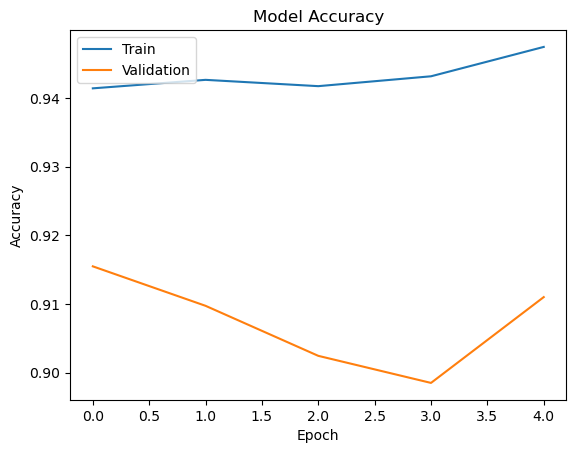

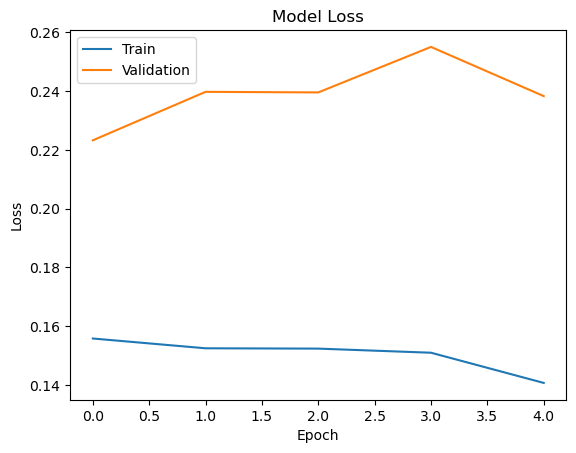

In [37]:
import matplotlib.pyplot as plt

# Plotting Accuracy vs Loss for Training and Validation Datasets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()